/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8919 - loss: 0.3456 - val_accuracy: 0.9699 - val_loss: 0.0967
Epoch 2/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9793 - loss: 0.0684 - val_accuracy: 0.9761 - val_loss: 0.0816
Epoch 3/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9881 - loss: 0.0407 - val_accuracy: 0.9820 - val_loss: 0.0580
Epoch 4/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9917 - loss: 0.0272 - val_accuracy: 0.9819 - val_loss: 0.0588
> 98.192
Epoch 1/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8879 - loss: 0.3521 - val_accuracy: 0.9723 - val_loss: 0.0940
Epoch 2/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9786 - loss: 0.0733 - val_accuracy: 0.9816 - val_loss: 0.0619
Epoch 3/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9876 - loss: 0.0450 - val_accuracy: 0.9818 - val_loss: 0.0602
Epoch 4/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9906 

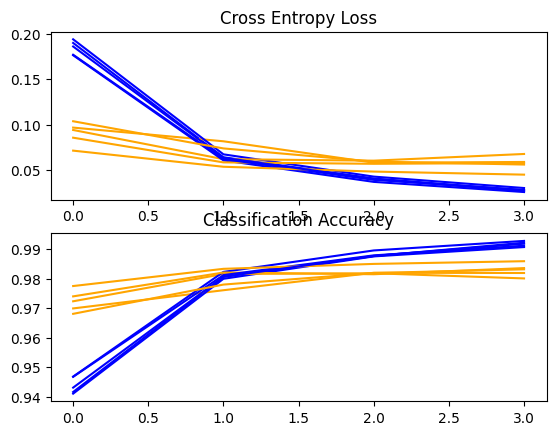

Accuracy: mean=98.293 std=0.193, n=5


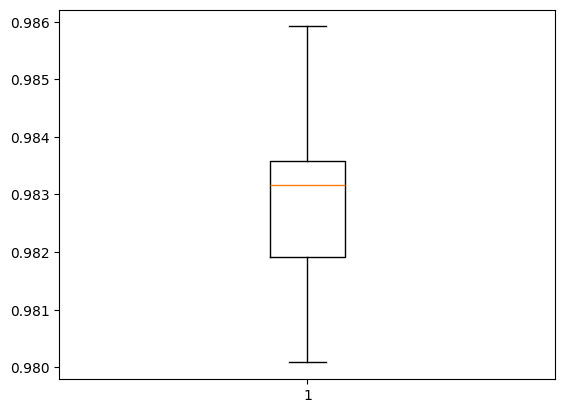

In [ ]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model with verbose=1 to see training progress at each epoch
        history = model.fit(trainX, trainY, epochs=4, batch_size=32, validation_data=(testX, testY), verbose=1)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # save the model weights after training on one fold
        model.save_weights('mnist_cnn_weights.weights.h5')
        # store scores
        scores.append(acc)
        histories.append(history)
    return scores, histories


# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

In [2]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Load and preprocess the CIFAR-10 dataset
def load_dataset():
    # Load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # One-hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# Scale pixel values to range 0-1
def prep_pixels(train, test):
    # Convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

# Define the CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Evaluate the model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_ix, test_ix in kfold.split(dataX):
        # Define the model
        model = define_model()
        # Select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # Fit the model
        history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY), verbose=1)
        # Evaluate the model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # Save the model weights
        model.save_weights('cifar10_cnn_weights.h5')
        # Store scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# Plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # Plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # Plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

# Summarize model performance
def summarize_performance(scores):
    # Print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores) * 100, std(scores) * 100, len(scores)))
    # Box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

# Run the test harness for evaluating a model
def run_test_harness():
    # Load dataset
    trainX, trainY, testX, testY = load_dataset()
    # Prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # Evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # Learning curves
    summarize_diagnostics(histories)
    # Summarize estimated performance
    summarize_performance(scores)

# Entry point, run the test harness
run_test_harness()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 86ms/step - accuracy: 0.3112 - loss: 1.8849 - val_accuracy: 0.5401 - val_loss: 1.2897
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.5530 - loss: 1.2554 - val_accuracy: 0.5905 - val_loss: 1.1545
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6256 - loss: 1.0621 - val_accuracy: 0.6229 - val_loss: 1.0683
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.6791 - loss: 0.9234 - val_accuracy: 0.6394 - val_loss: 1.0466
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.7098 - loss: 0.8306 - val_accuracy: 0.6501 - val_loss: 1.0114
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7404 - loss: 0.7408 - val_accuracy: 0.6701 - val_loss: 0.9666
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7784 - loss: 0.6405 - val_accuracy: 0.6674 - val_loss: 0.9983
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8072 - loss: 0.5542 - 

ValueError: The filename must end in `.weights.h5`. Received: filepath=cifar10_cnn_weights.h5

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 with ImageNet weights
imagenet_model = ResNet50(weights='imagenet')